**Objectives**

Perform more exploratory analysis on the input data for the logistic regression model. The goal is to come up with data filters and transformations that can be used to address assumptions about the research question. The model can then be re-evaulated and compared to the intial prediction rate results. 

Re-evaluate model with different techniques for constraining the observation
space:

○ Use subsets of meals within calorie distribution categories. For example: is there any
difference between low calories and high calorie meals?

○ Explore the possibility of transforming the input data from continuous to categorical.The
component variables contain a high amount of 0’s with a right tail heavy distribution.

○ Use only meals that are consumed at home, since eating out is generally more unhealthy

○ Constrain the non-seafood class to meals containing meat only. This will exclude vegetarian meals and compare seafood consumers to meat consumers.

○ Use a participant age filter, to look for adult participants only.

○ Attempt a classification of meals that contain both meat and seafood.

○ Convert input variables to standard units (some are in grams, some are in cups, etc.)

○ Input from research collaborators:

    ■ Obtain a more educated selection of input variables.

    ■ Attempt to weight the observations, to adjust for the survey design methods.

**Section 1: Meal Energy Statistics**

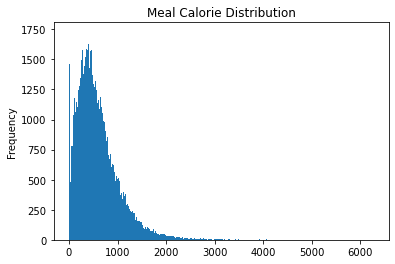

In [98]:
import pandas as pd

#Read data frame and add plant pf total variable
df = pd.read_csv('../../Data/nhanes_full_pre_proc.csv')
df['PF_PLANT_D_TOTAL'] = df['PF_EGGS']+df['PF_SOY']+df['PF_NUTSDS']+df['PF_LEGUMES']

df['DR1IKCAL'].plot.hist(bins=500, title='Meal Calorie Distribution')

The plot above is displaying the distribution of the KCAL variable. One apparent potential issue is the left most bar, indicating meals where this variable is equal to 0.

In [64]:
zero_kcal_meals = df[df['DR1IKCAL']==0]
len(zero_kcal_meals)

981

Indeed, there are 981 meals where KCAL = 0. 

In [65]:
zero_kcal_meals[['SEQN', 'DR1.030Z', 'DR1.020', 'DR1IKCAL']].head(5)

,SEQN,DR1.030Z,DR1.020,DR1IKCAL
361,31330,3,90000,0.0
413,31364,14,86400,0.0
489,31411,15,54000,0.0
490,31411,15,70200,0.0
491,31411,15,75600,0.0


Table: Sample of users with meals that are 0 KCAL, for further investigation.

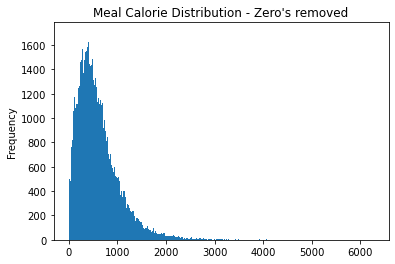

In [90]:
#Filter out 0 KCAL meals
df = df[df['DR1IKCAL'] > 0]
df['DR1IKCAL'].plot.hist(bins=500, title='Meal Calorie Distribution - Zero\'s removed')

Plot: Meal calories distribution with meals that are 0 KCAL removed. 

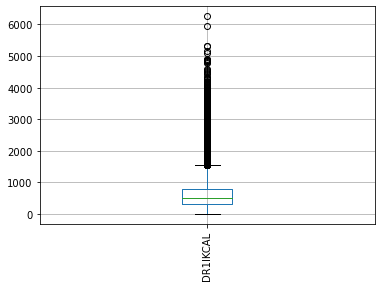

In [93]:
df.boxplot(column='DR1IKCAL',rot=90)

Plot: Boxplot of meal calories distribution with meals that are 0 KCAL removed. 

In [67]:
#Obtain statistics for KCAL 
df['DR1IKCAL'].describe()

count    101731.000000
mean        605.018942
std         445.749113
min           1.000000
25%         297.000000
50%         508.000000
75%         798.000000
max        6264.000000
Name: DR1IKCAL, dtype: float64

Table: Statistical distribution of the KCAL variable, with 0 KCAL meals removed.

In [68]:
#Home vs Out Meals
df.groupby('eathome')['DR1IKCAL'].describe()

,count,mean,std,min,25%,50%,75%,max
eathome,,,,,,,,
0,32830.0,687.545111,476.684325,1.0,360.0,587.0,899.0,5957.0
1,68901.0,565.696811,424.626035,1.0,271.0,471.0,751.0,6264.0


Table: Statistical distribution of the KCAL variable within the 'eathome' groups, with 0 KCAL meals removed.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5b4d5aa00>,
      dtype=object)

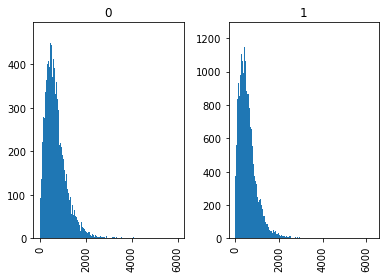

In [96]:
#Home vs Out Meals
df['DR1IKCAL'].hist(bins=500, by=df['eathome'])

Plot: Meal calories distribution with meals that are 0 KCAL removed, split by 'eathome' groups. 

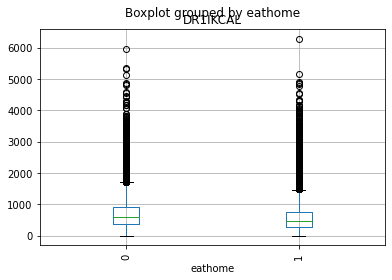

In [84]:
df.boxplot(column='DR1IKCAL',by='eathome',rot=90)

Plot: Boxplot of meal calories distribution with meals that are 0 KCAL removed, split by 'eathome' groups. 

In [70]:
#Seafood vs non seafood meals
df.groupby('seafood_meal')['DR1IKCAL'].describe()

,count,mean,std,min,25%,50%,75%,max
seafood_meal,,,,,,,,
0,95782.0,595.879560,442.124805,1.0,289.0,499.0,789.0,6264.0
1,5949.0,752.167759,477.014340,40.0,431.0,643.0,943.0,4451.0


Table: Statistical distribution of the KCAL variable within the 'seafood meal' groups, with 0 KCAL meals removed.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5c6b466a0>,
      dtype=object)

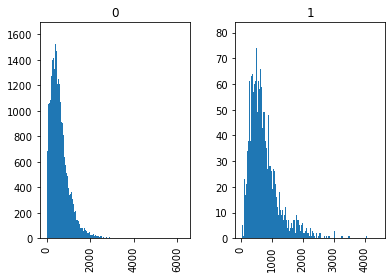

In [71]:
#Seafood vs non seafood meals
df['DR1IKCAL'].hist(bins=500, by=df['seafood_meal'])

Plot: Meal calories distribution with meals that are 0 KCAL removed, split by 'seafood meal' groups. 

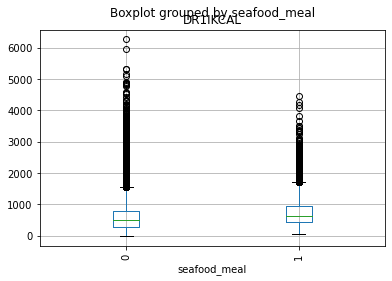

In [86]:
df.boxplot(column='DR1IKCAL',by='seafood_meal',rot=90)

Plot: Boxplot of meal calories distribution with meals that are 0 KCAL removed, split by 'seafood meal' groups. 

In [72]:
#Seafood vs non seafood home and out
df.groupby(['seafood_meal','eathome'])['DR1IKCAL'].describe()

count        mean         std   min     25%    50%  \
seafood_meal eathome                                                         
0            0        30638.0  675.534695  470.570282   1.0  352.00  576.0   
             1        65144.0  558.416800  422.941684   1.0  265.00  463.5   
1            0         2192.0  855.416971  527.356298  50.0  495.75  736.0   
             1         3757.0  691.927602  433.886534  40.0  403.00  599.0   

                          75%     max  
seafood_meal eathome                   
0            0         885.00  5957.0  
             1         743.00  6264.0  
1            0        1073.25  4451.0  
             1         860.00  3509.0

Table: Statistical distribution of the KCAL variable within the 'seafood meal' groups, split by 'eathome', with 0 KCAL meals removed.

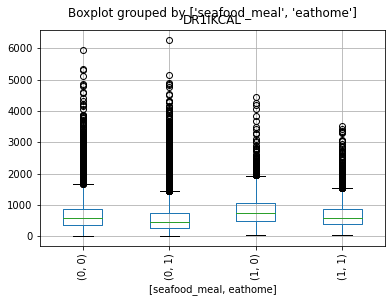

In [87]:
df.boxplot(column='DR1IKCAL',by=['seafood_meal','eathome'],rot=90)

Plot: Boxplot of meal calories distribution with meals that are 0 KCAL removed, split by 'seafood meal' and 'eathome' groups. 

**Section 1: Meal Energy Grouping**

Create meal energy grouping based on quantiles from the 'KCAL' variable.

In [73]:
#Create meal energy category based on quantiles from KCAL
df.loc[df['DR1IKCAL'] < df['DR1IKCAL'].describe()['25%'], 'meal_energy'] = "Low"
df.loc[(df['DR1IKCAL'] > df['DR1IKCAL'].describe()['25%']) 
       & (df['DR1IKCAL'] < df['DR1IKCAL'].describe()['50%']), 'meal_energy'] = "Medium-Low"
df.loc[(df['DR1IKCAL'] > df['DR1IKCAL'].describe()['50%']) 
       & (df['DR1IKCAL'] < df['DR1IKCAL'].describe()['75%']), 'meal_energy'] = "Medium-High"
df.loc[df['DR1IKCAL'] > df['DR1IKCAL'].describe()['75%'], 'meal_energy'] = "High"

#Display top of new meal energy category
df[['SEQN', 'DR1IKCAL','meal_energy']].head(20)

,SEQN,DR1IKCAL,meal_energy
0,31127,447.0,Medium-Low
1,31127,264.0,Low
2,31128,861.0,High
3,31129,867.0,High
4,31129,1150.0,High
5,31131,253.0,Low
6,31131,88.0,Low
7,31132,130.0,Low
8,31132,836.0,High
9,31132,491.0,Medium-Low


Table: Example of proposed meal energy categories.

**Section 1: Questions**

1. Why are there so many meals with 0 KCAL?
2. Why are the KCAL values so large? Looking at the statistics, these seem more like calories instead of kilo-calories.
3. Is the grouping method for this variable adequate?

**Section 2: FPED Component Statistics**

In [74]:
#Create a list of the high level food components, as defined in the FPED
#Fruit, Vegetables, Grains, Protein Foods, and Dairy components
#Include oils, fats, and sugars at this level.
food_cmp_level1 = ['F_TOTAL','V_TOTAL','G_TOTAL','D_TOTAL','OILS', 
                   'SOLID_FATS', 'ADD_SUGARS']


df[food_cmp_level1].describe()

,F_TOTAL,V_TOTAL,G_TOTAL,D_TOTAL,OILS,SOLID_FATS,ADD_SUGARS
count,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000
mean,0.190867,0.539173,2.096162,0.439611,7.444314,10.615657,3.896764
std,0.517877,0.727561,2.222114,0.717852,10.633179,13.289950,5.863417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.560000,0.000000,0.350000,1.210000,0.030000
50%,0.000000,0.290000,1.670000,0.070000,3.510000,6.440000,1.310000
75%,0.040000,0.790000,2.870000,0.670000,10.330000,14.920000,5.720000
max,19.640000,28.700000,56.650000,14.250000,271.030000,221.470000,128.280000


Table: statistical distribution of the Level 1 components.

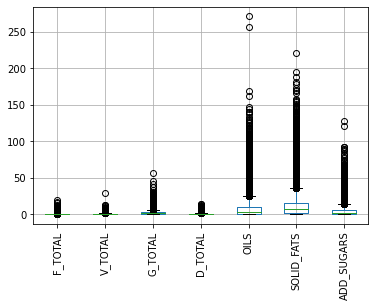

In [75]:
df[food_cmp_level1].boxplot(rot=90)

Plot: Boxplot of Level 1 components distribution. 

In [76]:
zero_count_table = []
for var in food_cmp_level1:
    zero_length = len(df[df[var]==0])
    non_zero_length = len(df[df[var]!=0])
    zero_count_table.append([var, zero_length, non_zero_length, round((100*zero_length)/len(df),2)])

zero_count_table = pd.DataFrame(zero_count_table)
zero_count_table.columns = ['Component', 'Num Zero', 'Num Non Zero', 'Percent Zero']

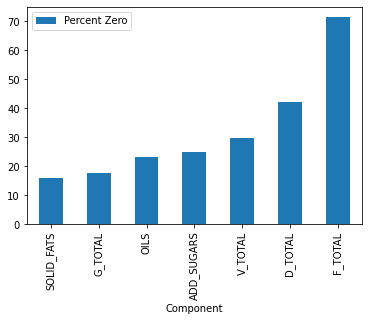

In [77]:
zero_count_table.sort_values(by='Percent Zero').plot.bar(x='Component',y='Percent Zero')

Plot: Percentage of 0's count within Level 1 components. 

In [78]:
food_cmp_level5 = ['F_CITMLB', 'F_OTHER', 'F_JUICE', 
                   'V_DRKGR', 'V_REDOR_TOMATO', 'V_REDOR_OTHER', 'V_STARCHY_POTATO', 
                   'V_STARCHY_OTHER', 'V_OTHER', 'V_LEGUMES', 
                   'G_WHOLE','G_REFINED', 
                   'PF_EGGS', 'PF_SOY', 'PF_NUTSDS', 'PF_LEGUMES', 
                   'D_MILK', 'D_YOGURT', 'D_CHEESE', 
                   'OILS', 'SOLID_FATS', 'ADD_SUGARS']  

df[food_cmp_level5[:-3]].describe()

,F_CITMLB,F_OTHER,F_JUICE,V_DRKGR,V_REDOR_TOMATO,V_REDOR_OTHER,V_STARCHY_POTATO,V_STARCHY_OTHER,V_OTHER,V_LEGUMES,G_WHOLE,G_REFINED,PF_EGGS,PF_SOY,PF_NUTSDS,PF_LEGUMES,D_MILK,D_YOGURT,D_CHEESE
count,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000,101731.000000
mean,0.036061,0.083847,0.070955,0.046066,0.113322,0.032593,0.123518,0.034165,0.189509,0.050802,0.143051,1.953103,0.092461,0.015541,0.073137,0.203421,0.162978,0.008339,0.265339
std,0.266438,0.315651,0.287517,0.211659,0.233921,0.127866,0.326874,0.156891,0.400805,0.210966,0.534355,2.202882,0.362471,0.163278,0.529916,0.844649,0.417030,0.074552,0.580337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.130000,0.000000,0.000000,0.000000,0.210000,0.000000,0.000000,2.710000,0.020000,0.000000,0.000000,0.000000,0.060000,0.000000,0.320000
max,18.940000,8.280000,7.970000,6.400000,5.030000,3.970000,6.760000,6.580000,28.700000,6.730000,22.550000,56.650000,9.600000,11.910000,48.000000,27.050000,8.040000,2.760000,14.250000


Table: statistical distribution of the Level 5 components.

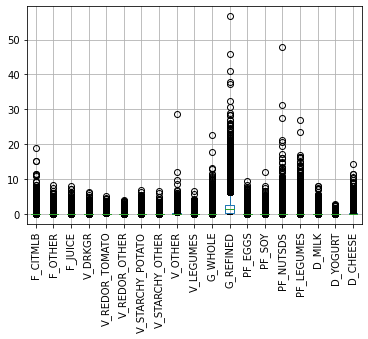

In [79]:
df[food_cmp_level5[:-3]].boxplot(rot=90)

Plot: Boxplot of Level 5 components distribution. 

In [80]:
zero_count_table = []
for var in food_cmp_level5[:-3]:
    zero_length = len(df[df[var]==0])
    non_zero_length = len(df[df[var]!=0])
    zero_count_table.append([var, zero_length, non_zero_length, round((100*zero_length)/len(df),2)])

zero_count_table = pd.DataFrame(zero_count_table)
zero_count_table.columns = ['Component', 'Num Zero', 'Num Non Zero', 'Percent Zero']

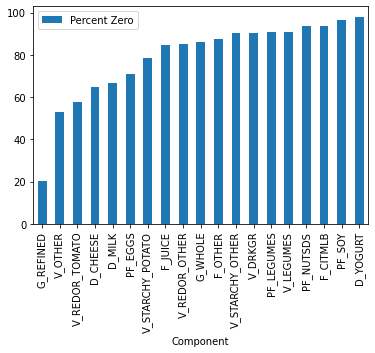

In [81]:
zero_count_table.sort_values(by='Percent Zero').plot.bar(x='Component',y='Percent Zero')

Plot: Percentage of 0's count within Level 5 components. 

**Section 2: Questions**

1. Would it be useful to use categories instead of quantities for the FPED components, due to the high number of 0's? The categories could be two, or more than two factors. For example, a two factor category could include: 'Yes' for any quantity > 0 and 'No' for quantities that are 0. A multi factor category could include: 'None' for any quantity that is 0, and the rest can be divided to 'Low', 'Medium', 'High', etc.

**Section 3: Meal Types**

In [128]:
df['meat_total'] = df['PF_MEAT']+df['PF_POULT']+df['PF_ORGAN']+df['PF_CUREDMEAT']
meals_contain_meat = df[df['meat_total']>0]
print("Number of meals that contain meat: "+str(len(meals_contain_meat)))
meals_contain_seafood = df[df['PF_SEAFD_TOT']>0]
print("Number of meals that contain seafood: "+str(len(meals_contain_seafood)))
meals_contain_both = df[(df['PF_SEAFD_TOT']>0) & (df['meat_total']>0)]
print("Number of meals that contain both meat and seafood: "+str(len(meals_contain_both)))
meals_contain_none = df[(df['PF_SEAFD_TOT']==0) & (df['meat_total']==0)]
print("Number of meals that contain no meat and no seafood: "+str(len(meals_contain_none)))

Number of meals that contain meat: 65820
Number of meals that contain seafood: 7709
Number of meals that contain both meat and seafood: 2346
Number of meals that contain no meat and no seafood: 31529


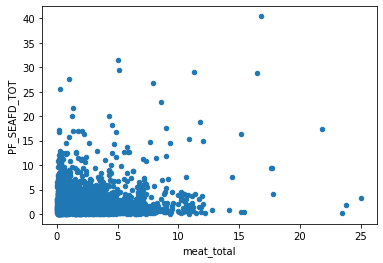

In [130]:
meals_contain_both.plot.scatter(x='meat_total', y='PF_SEAFD_TOT')

The plot above is showing the meat and seafood quantities in meals that contain both. 

**Section 3: Questions**

1. Can vegeterian meals be excluded and study focuses on seafood vs meat meals?
2. Can meals that contain both seafood and meat be excluded? Or should they be classified based on some threshold?